<hr style="border-width:2px;border-color:#84C7F7">
<center><h1> Cross-Domain MetaDL Competition </h1></center>
<center><h2>  Any-way Any-shot Learning </h2></center>
<hr style="border-width:2px;border-color:#84C7F7">

<center>
<button type="button" style="background-color: #4CAF50; border: none; color: white; padding: 15px 32px; text-align: center; text-decoration: none; display: inline-block; font-size: 16px; border-radius: 12px;"><a href="https://codalab.lisn.upsaclay.fr/competitions/3627" style="text-decoration: none; color: inherit;">Competition Site</a></button>
<button type="button" style="background-color: #4CAF50; border: none; color: white; padding: 15px 32px; text-align: center; text-decoration: none; display: inline-block; font-size: 16px; border-radius: 12px;"><a href="mailto:metalearningchallenge@googlegroups.com" style="text-decoration: none; color: inherit;">Contact us</a></button>
</center>

This tutorial is divided by level of complexity. However, all the levels are sequential. Therefore, each level assumes that you have already completed the previous levels.

* [1) **Beginner level**](#beginner) (no prerequisite): Approximate time required **10 minutes**.
* [2) **Intermediate level**](#intermediate) (some knowledge of Python and meta-learning): Approximate time required **20 minutes**.
* [3) **Advanced level**](#advanced) (solid knowledge of Python and meta-learning) : Approximate time required **30 minutes**.

<a name='beginner'></a>
# 1 Beginner Level

<a name='beginner_intro'></a>
## 1.1 Introduction

The goal of this competition is to produce a **Learner** that can quickly adapt to new tasks from multiple domains using only a few examples. Thus, you will have to tackle the **any-way any-shot learning problem**. The few-shot learning problems are often referred as *N*-way *k*-shots problems. This name refers to the configuration of the tasks at **meta-test time**. Each task consists of a small training set and a small test set, referred to as **support** and **query** sets, respectively. The number of **ways** *N* denotes the number of classes in a task that represents an image classification problem. The number of **shots** *k* denotes the number of examples per class in the **support set**. In our case, we focus on the **any-way any-shot** setting. In other words, the tasks at meta-test time represent image classification problems with a number of classes varying from 2 to 20, and the **support set** contains 1 to 20 labeled examples per class, *i.e.*, $N \in [2, 20]$, and $k \in [1, 20]$. Moreover, as this is a Cross-Domain competition, the tasks are drawn from one of 10 datasets from different domains. Thus, at meta-test time, your submission may be tested in the following way:
- **Test task 1:** 5-ways 1-shot task from Dataset 9.
- **Test task 2:** 3-ways 15-shots task from Dataset 3.
- **Test task 3:** 12-ways 4-shots task from Dataset 9.
- **Test task 4:** 2-ways 8-shots task from Dataset 8.
- $\vdots$

Cross-Domain MetaDL is an online competition with code submission, *i.e.*, you need to provide your submission as raw Python code that will be evaluated on the competition platform by 2 programs called "ingestion" and scoring" program as illustrated in the following figure.

<a name='beginner_workflow'></a>
<center>
<img src="./imgs/evaluation_flow.png" alt="Evaluation workflow of the competition" width=1500>
</center>

The details of `Your Submission` are explained in the [next section](#beginner_submission). Now, let's briefly describe the stages of the `Ingestion Program`:

* **Meta-training**: It is used to meta-train your algorithm with a large meta-training set including fully labeled data from 10 datasets that are different from those used for meta-testing, but from similar domains. The outcome of meta-training is a learner ready to tackle new tasks from the same domain, but different datasets. This is the stage you control the most. You can choose to use data in the form of **tasks** or **batches** (see [Example Figure](#beginner_data_format)). In both cases, you can select your preferred configurations. **Note:** The formal definition of **tasks** and **batches** will be provided in the [Advanced tutorial](#advanced_definitions) since it is not required at this point.
* **Meta-validation (optional)**: It can be used to evaluate your learners (and select the best one) on new test tasks in the process of learning (these test tasks are only for validation purposes, not for ranking participants). At this stage, the data is always in the form of **tasks**, but you can still select your preferred configurations.
* **Meta-testing**: We will use it to evaluate your algorithm's ability to quickly adapt to new unseen any-way any-shot tasks from several domains. At this stage, you have no control, the data is always in the form of **any-way any-shot tasks** with $N \in [2, 20]$ and $k \in [1, 20]$. It is worth mentioning that at this stage, the test labels are hidden to your selected learner.

Example of **task** and **batch** data format:

<a name='beginner_data_format'></a>
<center>
<img src="./imgs/train_settings.png" alt="Example of data format" width=650>
</center>

<a name='beginner_submission'></a>
## 1.2 Submission Details

A **submission** is a zip file containing at least three files: `api.py`, `model.py`, and `metadata`. The former contains the API specification we defined for the competition, you just have to copy this file into your submission folder (you can find this file in any given baseline's folder). For this part of the tutorial, you do not need to understand the API, we will explain the details in the [intermediate tutorial](#intermediate). `model.py` is your implementation of the API, *i.e.*, it contains your proposed approach for the any-way any-shot problem. `metadata` is just an empty file for the competition server to work properly, you simply add it to your folder without worrying about it (you can find this file in any given baseline's folder). Lastly, you are free to add any additional files you may need for your algorithm.

Now, let's look at a real example of the `model.py`. Please see how a random seed is set at the beginning of the file to guarantee reproducibility. In this competition, it is MANDATORY that you seeded your algorithms. Make sure there are NO OTHER HARD CODED RANDOM SEEDS in your code.

In [ ]:
from main_utils import display

display("baselines/random/model.py")

Now you are ready to zip your code and submit it on the [CodaLab platform](https://codalab.lisn.upsaclay.fr/competitions/3627#participate) from July 1st. As an example, we zip the folder with the random baseline shown above.

In [2]:
from main_utils import zipdir

model_dir = "baselines/random/"
submission_filename = "example_submission.zip"
zipdir(submission_filename, model_dir)
print(f"Your file {submission_filename} is ready")

Your file example_submission.zip is ready


## 1.3 Next Steps

Congratulations you finished the beginner tutorial. At this point, you should have a valid submission for this competition (random baseline). Now, you can continue with the [Intermediate tutorial](#intermediate).

If you run into bugs or issues when using this starting kit, please create issues on the [*Issues* page](https://github.com/DustinCarrion/cd-metadl/issues) of this competition.

<hr style="border-width:4px;border-color:#84C7F7">

<a name='intermediate'></a>
# 2 Intermediate Level

We assume you read the [beginner tutorial](#beginner). We now go over more advanced topics: 

1. [Public Data](#intermediate_public_data)
2. [Configuring the environment](#intermediate_env)
3. [Challenge API](#intermediate_API)
4. [Data Configuration File](#intermediate_config)
5. [Fine-tuning Baseline](#intermediate_finetuning)

<a name='intermediate_public_data'></a>
## 2.1 Public Data

This competition uses 30 datasets from the newly created [Meta Album meta-dataset](https://meta-album.github.io). These datasets belong to 10 domains:

* Large Animals
* Small Animals
* Plants
* Plant Diseases
* Microscopy
* Remote Sensing
* Vehicles
* Manufacturing
* Human Actions
* Optical Character Recognition

Each phase of the competition (Public, Feedback, Final) has its own group of datasets. Each group of datasets is composed of 1 dataset per domain, *i.e.*, 10 datasets in total. Additionally, each dataset is uniformly formatted following [these instructions](https://github.com/ihsaan-ullah/meta-album/tree/master/DataFormat). The [Public Data for this competition](https://codalab.lisn.upsaclay.fr/competitions/3627#participate-get_starting_kit) corresponds to the first group of datasets. 

We will use the Public Data in this tutorial to better understand the difference between **tasks** and **batches** introduced in the [beginner tutorial](#beginner_data_format). For this reason, before continuing with the next sections, please make sure you have the Public Data for which you have two options:

1. Download the Public Data from the `Files` tab of the [Competition Site](https://codalab.lisn.upsaclay.fr/competitions/3627#participate-get_starting_kit), copy the downloaded zip in this folder and unzip it.

2. Execute the following cell. It will install the `requests` library (if you do not have it already)  to download the Public Data. Take into account that this step will get all 10 public datasets (more than 66,000 files).

In [4]:
from main_utils import download_public_data

download_public_data()

Start of download, please wait
Download completed
Unzipping Public Data, please wait
The Public Data is ready


To verify that the Public Data is correct, please execute the following cell.

In [5]:
from main_utils import verify_public_data

verify_public_data()

Your Public Data is correct, you can continue with the tutorial


<a name='intermediate_API'></a>
## 2.2 Challenge API

As explained in the [beginner tutorial](#beginner_submission), your solutions must follow our defined API. The following figure shows the details of the API.

<center>
<img src="./imgs/API.png" alt="Challenge API" width=600>
</center>

Let's describe each class:
* **MetaLearner**: It contains the meta-algorithm logic. The `meta_fit(meta_train_generator, meta_valid_generator)` method has to be overwritten with your own meta-learning algorithm. In general, a **MetaLearner** is meta-trained and returns a **Learner**, to be meta-tested. **IMPORTANT**: It is not mandatory to meta-learn in the `meta_fit(meta_train_generator, meta_valid_generator)` method, you can return a "hard-coded" learning algorithm (**Learner**).
* **Learner**: It encapsulates the logic to learn from a new unseen task. Several methods need to be overwritten: 
  * `fit(support_set)`: Fits the **Learner** to a new unseen task.
  * `save(path)`: Saves your **Learner** in the specified path. 
  * `load(path)`: Loads your **Learner** from the file(s) you created in `save(path)`.
  
  In general, a **Learner** is trained on the support set of a meta-test task and returns a **Predictor**, to be tested on the unlabelled query set of that same task.

* **Predictor**: It contains the logic of your **Learner** to make predictions once it is fitted. The `predict(query_set)` method receives the unallabeled query set of a task and processes it with the trained **Learner** produced by the `fit(support_set)` method. The **Predictor** can return the raw logits (matrix), the probabilities for each label (matrix), or the predicted labels (1D array).  

<a name='intermediate_env'></a>
## 2.3 Configuring the environment

The remaining sections of this tutorial require the dependencies specified in the `requirements.txt` to be installed. You can:

1. Execute the following cell to install all the dependencies in your current session/environment.
2. Follow [these instructions](https://github.com/DustinCarrion/cd-metadl/blob/main/optional_instructions/anaconda_config.md) to configure a conda environment.
3. Follow [these instructions](https://github.com/DustinCarrion/cd-metadl/blob/main/optional_instructions/docker_config.md) to use docker.

**Note:** From the above list, you can follow any of the options, you do not have to follow all of them. Moreover, you just have to follow this process once, next time you access the tutorial, you can skip this section. 

In [ ]:
# If you want to install the dependencies in your current session/environment 
# please run this cell, otherwise, you can continue with the tutorial

!pip install -r requirements.txt

<a name='intermediate_config'></a>
## 2.4 Data Configuration File

As shown in the [previous section](#intermediate_API), the `meta_fit` method of the **MetaLearner** receives two data generators (`meta_train_generator` and `meta_valid_generator`). In the [beginner tutorial](#beginner_intro) we mentioned that you can select your preferred configurations for them. Thus, an additional file that you may want to include in your submission is `config.json`. This file can be used to specify all the details of the data format that you would like to use. Here is an example of a config file with all the possible configurations that you can define:

**Content of a `config.json` file**:
```bash
{
    "train_data_format": "task",
    "batch_size": null,
    "train_config": {
        "N": 10,
        "min_N": null,
        "max_N": null,
        "k": null,
        "min_k": 5,
        "max_k": 10,
        "query_images_per_class": 5
    },
    "validation_datasets": 2,
    "valid_config": {
        "N": null,
        "min_N": 2,
        "max_N": 5,
        "k": 20,
        "min_k": null,
        "max_k": null,
        "query_images_per_class": 10
    }
}
```
The above example configuration corresponds to:

* `meta_train_generator`: 10-ways any-shot tasks with with $k \in [5, 10]$ and 5 images per class for the query set.

* `meta_valid_generator`: any-way 20-shots tasks with with $N \in [2, 5]$ and 10 images per class for the query set.

Additionally, 2 of the available datasets will be used for the meta-validation split and the remaining datasets will be used for the meta-training split. 

For clarity, the available configurations are:

- `train_data_format`: Format for the training data, it can be "task" or "batch".
- `batch_size`: Batch size for the generated batches. Only used if `train_data_format` is "batch", in which case `train_config` is ignored. It cannot be less than 1.
- `train_config`: Configuration for the training data. Only used if `train_data_format` is "task", in which case `batch_size` is ignored.
  - `N`: Fixed number of ways for the generated tasks at meta-train time. It cannot be less than 2.
  - `min_N`: Lower bound for the number of ways for the generated tasks at meta-train time. Only used if `N` is `null`. It cannot be less than 2 and must be less than or equal to `max_N`.
  - `max_N`: Upper bound for the number of ways for the generated tasks at meta-train time. Only used if `N` is `null`. It must be greater or equal to `min_N`.
  - `k`: Fixed number of shots for the generated tasks at meta-train time. If you would like to use any-shot configuration, then you have to define this parameter as `null`. It cannot be less than 1.
  - `min_k`: Lower bound for the number of shots for the generated tasks at meta-train time. Only used if `k` is `null`. It cannot be less than 1 and must be less than or equal to `max_k`.
  - `max_k`: Upper bound for the number of shots for the generated tasks at meta-train time. Only used if `k` is `null`. It must be greater or equal to `min_k`.
  - `query_images_per_class`: Number of examples per class to include in the query set at meta-train time. It cannot be greater than 20.
- `validation_datasets`: Number of datasets to be used for the meta-valid split. The split between train and validation datasets is done randomly, *i.e.*, if there are 10 datasets available for training, and you specify `validation_datasets: 3`, 3 out of the 10 available datasets will be randomly selected to create the meta-valid split. If you do not want to use meta-validation, you can either specify this configuration as `null` or 0, but in that case, the `meta_valid_generator` that you will receive will be `None`. It cannot be greater than 9. 
- `valid_config`: Configuration for the validation data.
  - `N`: Fixed number of ways for the generated tasks at meta-validation time. If you would like to use any-way configuration, then you have to define this parameter as `null`. It cannot be less than 2.
  - `min_N`: Lower bound for the number of ways for the generated tasks at meta-validation time. Only used if `N` is `null`. It cannot be less than 2 and must be less than or equal to `max_N`.
  - `max_N`: Upper bound for the number of ways for the generated tasks at meta-validation time. Only used if `N` is `null`. It must be greater or equal to `min_N`.
  - `k`: Fixed number of shots for the generated tasks at meta-validation time. If you would like to use any-shot configuration, then you have to define this parameter as `null`. It cannot be less than 1.
  - `min_k`: Lower bound for the number of shots for the generated tasks at meta-validation time. Only used if `k` is `null`. It cannot be less than 1 and must be less than or equal to `max_k`.
  - `max_k`: Upper bound for the number of shots for the generated tasks at meta-validation time. Only used if `k` is `null`. It must be greater or equal to `min_k`.
  - `query_images_per_class`: Number of examples per class to include in the query set at meta-validation time. It cannot be greater than 20.

**Note:** In the case of **tasks** (meta-train or meta-validation), if the configurations that you specify are greater than the maximum available number of classes in case of `N` or the maximum available number of examples per class in case of `k`, these values will be automatically adjusted to the available data. 

<font color="red">**IMPORTANT:**</font> The `config.json` file is OPTIONAL, if you do not include it, the default configuration will be used:

**Default configuration**
```bash
{
    "train_data_format": "task",
    "batch_size": null,
    "train_config": {
        "N": 5,
        "min_N": null,
        "max_N": null,
        "k": null,
        "min_k": 1,
        "max_k": 20,
        "query_images_per_class": 20
    },
    "validation_datasets": 0,
    "valid_config": {
        "N": null,
        "min_N": 2,
        "max_N": 20,
        "k": null,
        "min_k": 1,
        "max_k": 20,
        "query_images_per_class": 20
    }
}
```

To better understand how the configuration affects the `meta_train_generator` and `meta_valid_generator`, the following code allow you to test and visualize your preferred configurations.

<font color="red">**IMPORTANT:**</font> The below code will plot maximum 10 images per row and 10 images per column to avoid occupying too much space.

********************** Meta-train generator info *********************

The task object is organized in the following way:
Example of Task (t):
	- t.num_ways: int = 3
	- t.num_shots: int = 5
	- t.support_set: Tuple[torch.Tensor, torch.Tensor, torch.Tensor] (images, encoded labels, original labels)
	- t.query_set: Tuple[torch.Tensor, torch.Tensor, torch.Tensor] (images, encoded labels, original labels)
	- t.dataset: str = BCT

The tensor with the support set images has the following shape: torch.Size([15, 3, 128, 128]) ([num_ways*num_shots, image channels, image height, image width])
The support set encoded labels are: tensor([0, 1, 2]) and the shape is: torch.Size([15]) ([num_ways*num_shots])
The support set original labels are: tensor([12, 22, 32]) and the shape is: torch.Size([15]) ([num_ways*num_shots])

The tensor with the query set images has the following shape: torch.Size([15, 3, 128, 128]) ([num_ways*query_images_per_class, image channels, image height, image width])
The query 

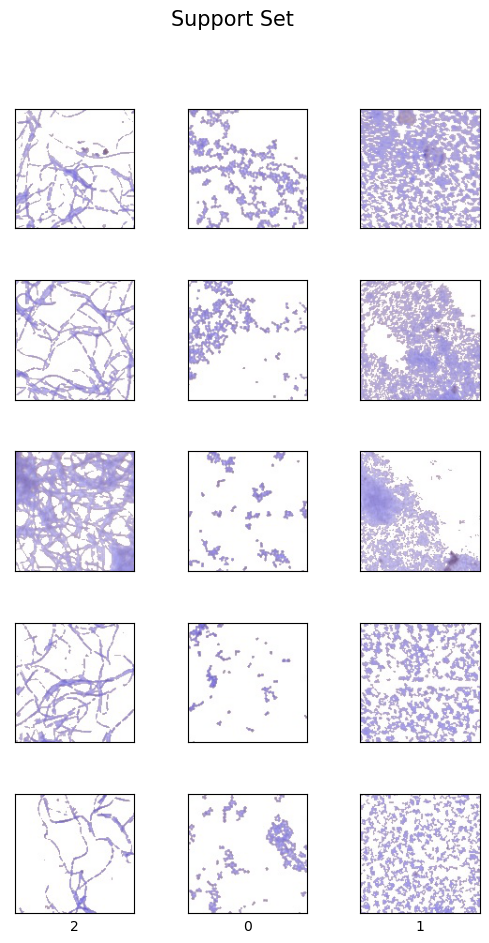

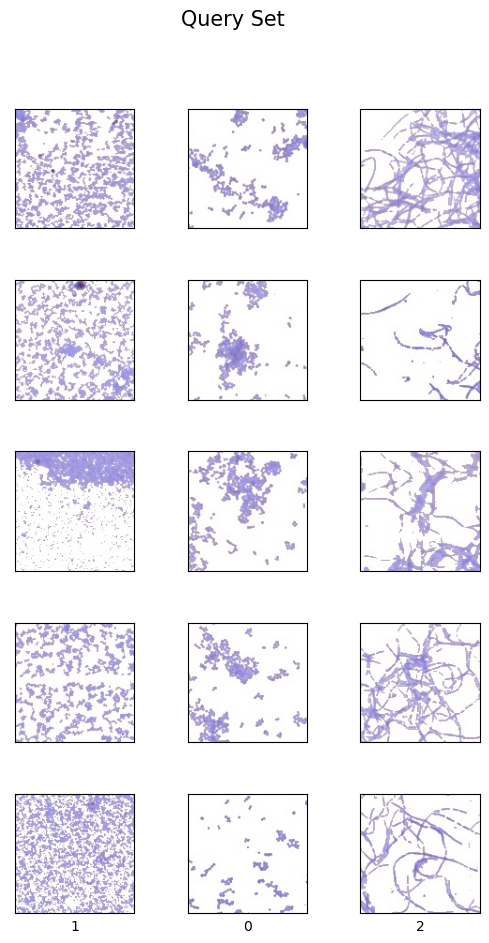



Task 2 from Dataset BCT
# Ways: 3
# Shots: 3


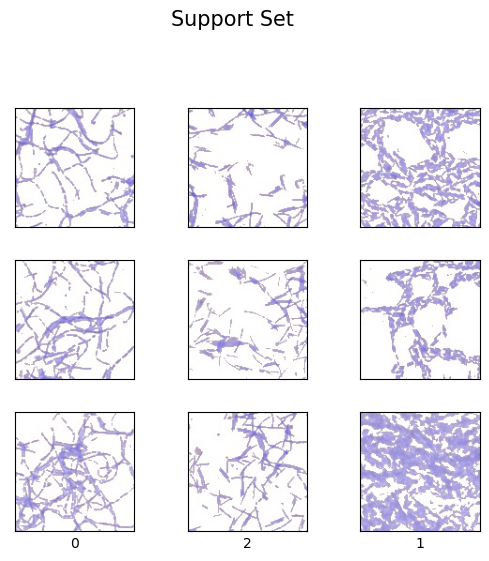

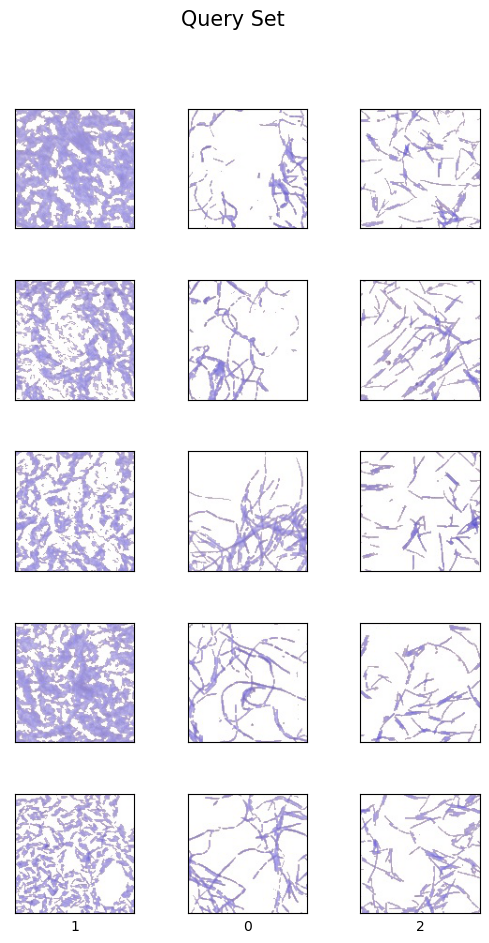



Examples of the data generated with meta_valid_generator


Task 1 from Dataset BRD
# Ways: 5
# Shots: 3


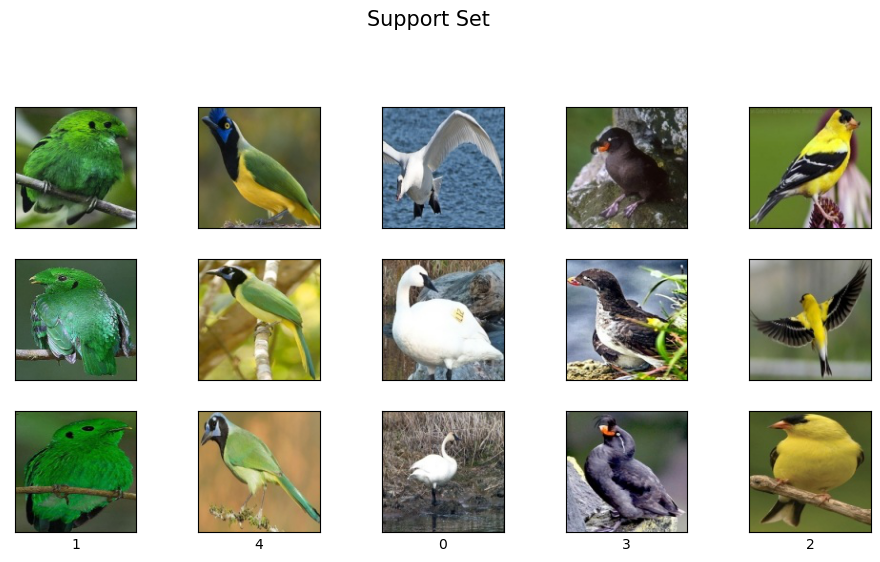

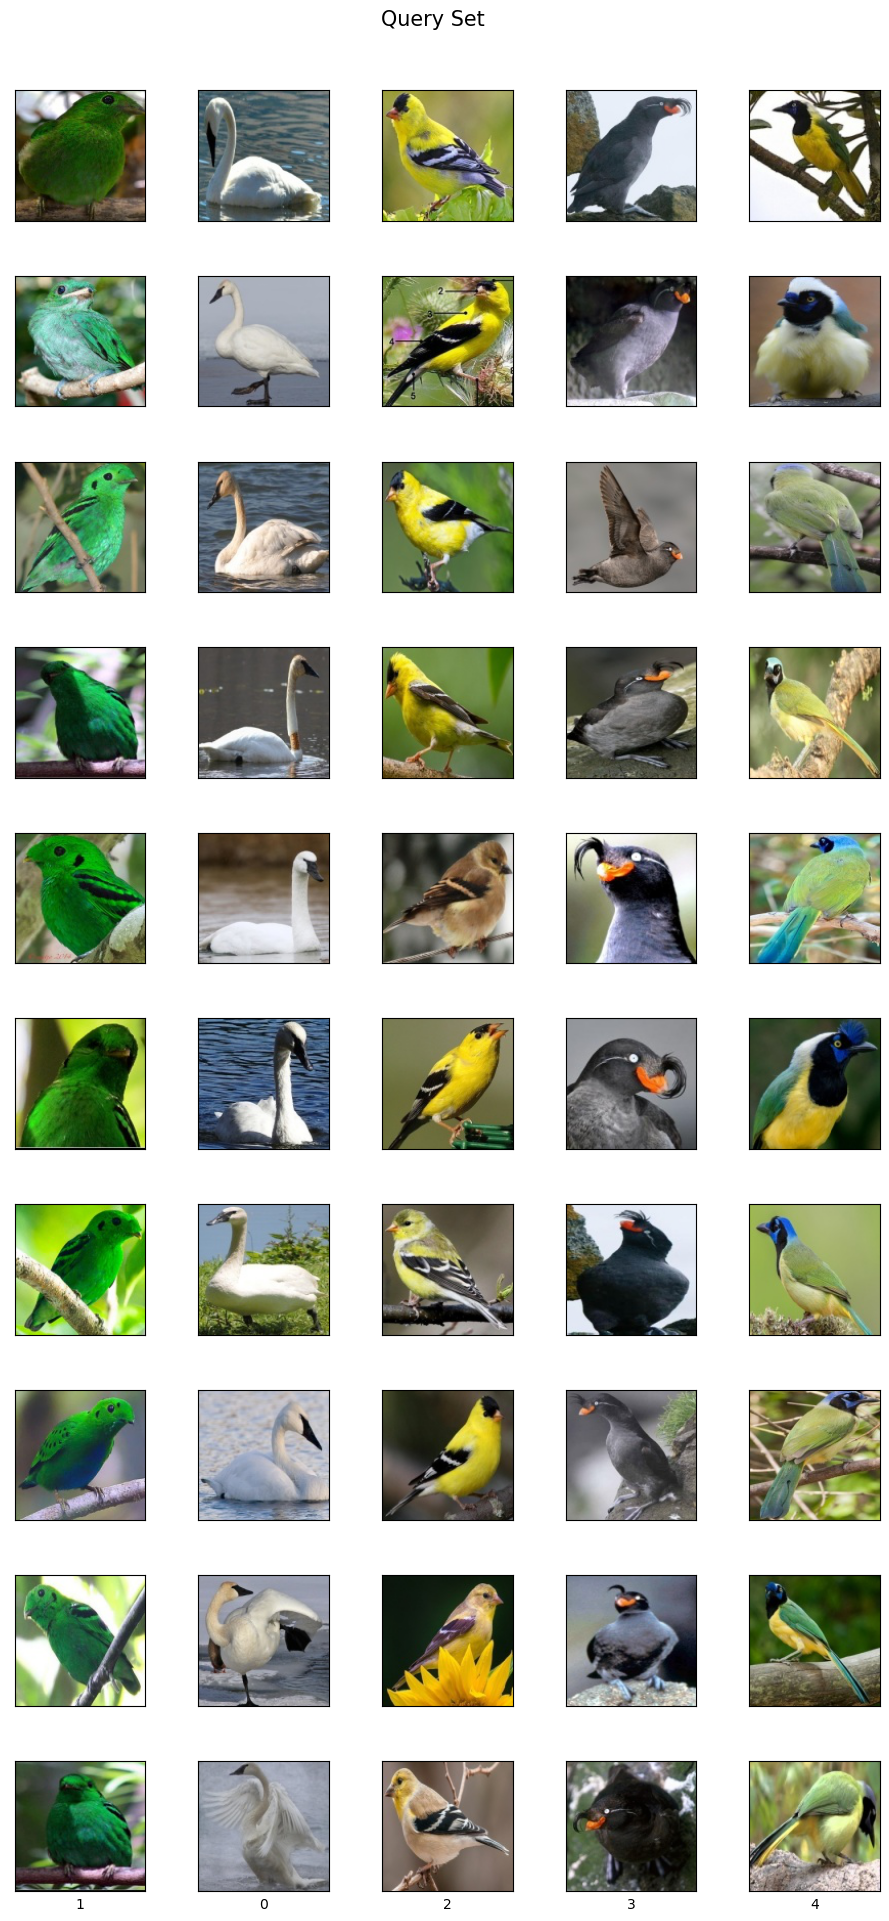



Task 2 from Dataset CRS
# Ways: 2
# Shots: 3


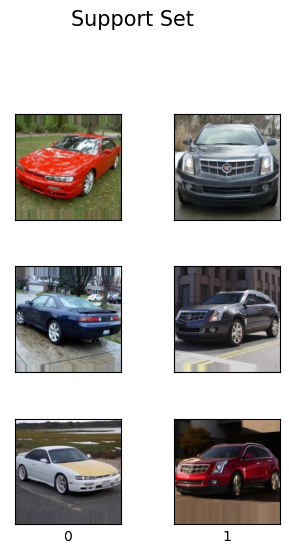

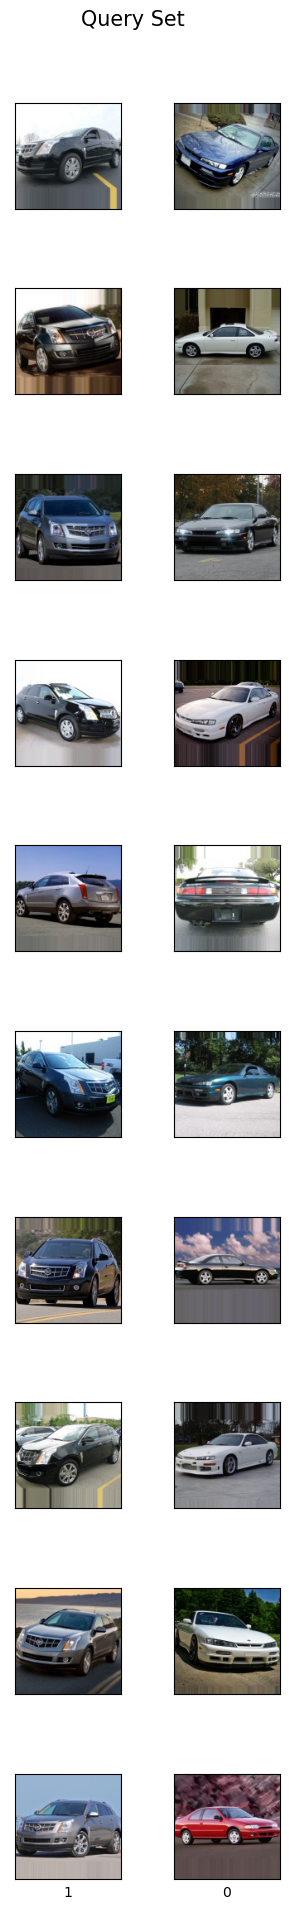

In [3]:
from tutorial_utils import initialize_generators, plot_data

path_to_public_data = "public_data" # Do not update this value unless you have 
                                    # moved the downloaded Public Data 
config = {
    "train_data_format": "task",
    "batch_size": None,
    "train_config": {
        "N": 3,
        "min_N": None,
        "max_N": None,
        "k": None,
        "min_k": 2,
        "max_k": 5,
        "query_images_per_class": 5
    },
    "validation_datasets": 2, # Since the public data has only 5 datasets for 
                              # meta-training, this parameter cannot be greater 
                              # than 4. However, in your submissions to the 
                              # Competition Site you can use up to 9 validation 
                              # datasets
    "valid_config": {
        "N": None,
        "min_N": 2,
        "max_N": 5,
        "k": 3,
        "min_k": None,
        "max_k": None,
        "query_images_per_class": 10
    }
}

# During the competition, you do not have to initialize the generators, rather 
# you will automatically receive the initialized generators in the meta_fit 
# method of the MetaLeaner class. The only thing that you have to do if you want
# to use your custom data configuration is to include the config.json file as 
# previously explained 
meta_train_generator, meta_valid_generator = initialize_generators(config, 
    path_to_public_data)


# Visualization of the generated data
print("Examples of the data generated with meta_train_generator")
number_of_examples_to_visualize = 2
for i, data in enumerate(meta_train_generator(number_of_examples_to_visualize)):
    plot_data(data, i)

if meta_valid_generator is not None:
    print("\n\nExamples of the data generated with meta_valid_generator")
    for i, data in enumerate(meta_valid_generator(number_of_examples_to_visualize)):
        plot_data(data, i)

<a name='intermediate_finetuning'></a>
## 2.5 Fine-tuning Baseline

In the [beginner tutorial](#beginner_submission) you examined the **Random** baseline which as its name indicates just outputs random predictions. In this tutorial you will explore the **Fine-tuning** baseline which pre-trains a network with batches of data from the meta-training split and during meta-testing only fine-tunes the last layer.

In [4]:
from tutorial_utils import display

display("baselines/finetuning/model.py")

""" This baseline pre-trains a network with batches of data from the 
meta-training split and during meta-testing only fine-tunes the last layer. The 
network initilization at meta-training time can be with:
1. Random weights (Meta-learning league)
2. Pretrained weights (Free-style league)
"""
import os
import random
import pickle
import contextlib
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Iterable, Any, Tuple

from network import ResNet
from helpers_finetuning import *

from api import MetaLearner, Learner, Predictor

# --------------- MANDATORY ---------------
SEED = 98
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
random.seed(SEED)    
torch.manual_seed(SEED)
np.random.seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
# -----------------------------------------


class MyMetaLearner(MetaLearner):

    def __init__(self, 
                 train_classes: int, 
    

The above example shows how the **MetaLearner** uses the `meta_train_generator` to produce a **Learner** that can be further adapted to unseen tasks. Additionally, the `meta_valid_generator` is used to select the best **Learner** and avoid overfitting since the best **Learner** is not necessarily the one at the end of all meta-train steps but rather the one with the highest performance on the meta-validation set.

Moreover, you can check how the **Learner** can be saved and loaded. These two operations are crucial since the `ingestion program` will re-instantiate your **Learner** in each meta-test task, and the `load` method will be responsible for initializing it.

Lastly, you can see how the **Learner** is trained on the support set of a meta-test task to produce a **Predictor** that returns the predictions (in the form of a probability matrix rather than raw predictions) based on the query set of the same task.

**Note:** Remember that in this competition, it is MANDATORY that you seeded your algorithms. Make sure there are NO OTHER HARD CODED RANDOM SEEDS in your code.

As in the [beginner tutorial](#beginner_submission) you can use the following cell to zip the Fine-tuning baseline and submit it on the [CodaLab platform](https://codalab.lisn.upsaclay.fr/competitions/3627#participate) from July 1st. 

In [5]:
from tutorial_utils import zipdir

model_dir = "baselines/finetuning/"
submission_filename = "finetuning_baseline.zip"
zipdir(submission_filename, model_dir)
print(f"Your file {submission_filename} is ready")

Your file finetuning_baseline.zip is ready


## 2.6 Next Steps

<hr style="border-width:4px;border-color:#84C7F7">

<a name='advanced'></a>
# 3 Advanced Level

We assume you read the [intermediate tutorial](#intermediate). We now go over more advanced topics: 

1. [Formal Definitions](#advanced_definitions)
2. [Logger](#advanced_logger)
3. [Prototypical Networks Baseline](#advanced_proto)
4. [Local Testing](#advanced_test)
5. [Suggestions for Submissions](#advanced_suggestions)

<a name='advanced_definitions'></a>
## 3.1 Formal Definitions

In the [beginner](#beginner_intro) and [intermediate](#intermediate_config) tutorials, we have been referring to **tasks** and **batches**, but we never formally defined them. Therefore, for completeness, this section presents the formal definition for both terms. 

Tasks are individual mini classification problems defined in the few-shot learning setting we are considering in this challenge. The meta-testing data will always be split into tasks. However, you have a choice to either split the meta-training data also into tasks or split it into batches (similarly to what is usually done in "regular" learning problems).

**Task:** It represents a ***N*-way *k*-shot task** and it is defined as $ \mathcal{T_j} = \{ \mathcal{D}_{\mathcal{T_j}}^{train}, \mathcal{D}_{\mathcal{T_j}}^{test}\}$, where $\mathcal{D}_{\mathcal{T_j}}^{train}$ corresponds to the *support set* that contains *N* classes (ways) and *k* examples per class (shots) for the *j*th task $\mathcal{T_j}$, and $\mathcal{D}_{\mathcal{T_j}}^{test}$ is the *query set* that contains the labeled test examples of the same *N* classes for $\mathcal{T_j}$. Since this competition is focused on the cross-domain few-shot learning setting, the data contained in one task belongs strictly to one dataset, but different tasks may come from different datasets because the meta-training split is composed of multiple datasets, *i.e.*, $\mathcal{M}_{\mathcal{D}}^{train} = \{\mathcal{D}_1, \dots, \mathcal{D}_n\}$. The number of datasets ($n$) in the meta-training split $\mathcal{M}_{\mathcal{D}}^{train}$ depends on the number of datasets you want to use for the meta-validation split. During the **public phase** you will have **5 datasets** that you can use for meta-training and meta-validation (*e.g.*  $\mathcal{M}_{\mathcal{D}}^{train} = \{\mathcal{D}_1, \mathcal{D}_2, \mathcal{D}_3\}$ and $\mathcal{M}_{\mathcal{D}}^{valid} = \{\mathcal{D}_4, \mathcal{D}_5\}$) because the remaining 5 datasets are used for the meta-testing split ($\mathcal{M}_{\mathcal{D}}^{test} = \{\mathcal{D}_6, \dots, \mathcal{D}_{10}\}$). However, during the **feedback phase**, you will have **10 datasets** that you can use for meta-training and meta-validation, and during the **final phase**, you will have **20 datasets** for the same purpose. 

**Batch:** It is a collection of sampled examples from the meta-training data. The meta-training data is first concatenated to create a single large dataset including all classes, from which batches of data are sampled, *i.e.*, $\mathcal{D}^{train} = concat(\mathcal{D}_1, \dots, \mathcal{D}_n)$. As before, the public data is divided into **5 datasets** for the **meta-train split** and **5 datasets** for the **meta-test split** (the meta-train split can be further divided into meta-train and meta-validation).

Generally, the methods used to tackle the few-shot learning problem differ in the way the preprocessing layers of the backbone are trained and the type of classifier used. The preprocessing layers (computing a feature embedding) are meta-trained either in an "episodic" manner (making use of a split into tasks) or in a "regular" batch training manner. Therefore, since you can select the data format during meta-training, you can perform these two meta-training approaches. For example, the [Fine-tuning baseline](#intermediate_finetuning) introduced in the intermediate tutorial uses the regular batch training, but the [Prototypical Networks baseline](#advanced_proto) covered in the next section uses "episodic" training.

**Note:** The division of the public data can be found in the `public_data/info/meta_splits.txt` file. We strongly recommend that you do not alter this file unless you are completely sure you understand your changes.

<a name='advanced_logger'></a>
## 3.2 Logger

In the [intermediate tutorial](#intermediate_API), we explained the Challenge API, and we introduced the **MetaLearner** $\rightarrow$ **Learner** $\rightarrow$ **Predictor** structure. In this tutorial, we will focus on a very important operation that can be performed by the **MetaLearner**, logging the performance of the meta-learning process. 

At its initialization, the **MetaLearner** always receives three parameters:

* `train_classes` (int): Total number of classes that can be seen during meta-training. If the data format during training is **task**, then this parameter corresponds to the number of ways, while if the data format is **batch**, this parameter corresponds to the total number of classes across all training datasets.
* `total_classes` (int): Total number of classes across all training datasets. If the data format during training is **batch** this parameter is exactly the same as `train_classes`.
* `logger` (Logger): Logger that you can use during meta-learning (**HIGHLY RECOMMENDED**). You can use it after each meta-train or meta-validation iteration as explained below.

Thanks to the parent initialization of the **MetaLearner**:
```python
super().__init__(train_classes, total_classes, logger)
```

You will have access to the method `self.log(data, predictions, loss, meta_train)` where:   
* `data` (task or batch): It is the data used in the current iteration.
* `predictions` (np.ndarray): Predictions associated to each test example in the specified data. It can be the raw logits matrix (the logits are the unnormalized final scores of your model), a probability matrix, or the predicted labels.
* `loss` (float, optional): Loss of the current iteration. Defaults to None.
- `meta_train` (bool, optional): Boolean flag to control if the current iteration belongs to meta-training. Defaults to True.

This method will:
1. Print detailed performance logs that you can see in the `View ingestion output log` option of the [Competition Site](https://codalab.lisn.upsaclay.fr/competitions/3627#participate-submit_results) after your submission finishes its execution. The logs will contain: 
    - The number of the meta-train or meta-valid iteration. 
    - The performance of the iteration, which in the case of **tasks**, will be the **Normalized Accuracy** and **Accuracy** ([see below](#advanced_metrics) for the definitions), and for **batches**, it will only include the Accuracy.
    - The loss if it is specified when calling the `self.log(data, predictions, loss, meta_train)` method.
    - If the data is a task, the logs will also contain the task configuration, i.e., \[*N*-way *k*-shot task from *dataset*\]. 

    An example of logs is shown below:

```bash
Meta-train iteration 1:	0.2375 (Normalized Accuracy)	0.3900 (Accuracy)	0.0105 (Loss)	[5-way 10-shot task from FLW]
Meta-train iteration 2:	0.3250 (Normalized Accuracy)	0.4600 (Accuracy)	0.0230 (Loss)	[5-way 10-shot task from BCT]
Meta-train iteration 3:	0.3500 (Normalized Accuracy)	0.4800 (Accuracy)	0.0220 (Loss)	[5-way 10-shot task from BCT]
Meta-train iteration 4:	0.3875 (Normalized Accuracy)	0.5100 (Accuracy)	0.0145 (Loss)	[5-way 10-shot task from FLW]
Meta-train iteration 5:	0.3250 (Normalized Accuracy)	0.4600 (Accuracy)	0.0282 (Loss)	[5-way 10-shot task from BCT]

############################## Meta-valid step 1 ##############################
Meta-valid iteration 1:	0.4000 (Normalized Accuracy)	0.5200 (Accuracy)	[5-way 5-shot task from BRD]
Meta-valid iteration 2:	0.1125 (Normalized Accuracy)	0.2900 (Accuracy)	[5-way 5-shot task from CRS]
Meta-valid iteration 3:	0.2875 (Normalized Accuracy)	0.4300 (Accuracy)	[5-way 5-shot task from BRD]
Meta-valid iteration 4:	0.2375 (Normalized Accuracy)	0.3900 (Accuracy)	[5-way 5-shot task from BRD]
###############################################################################

Meta-train iteration 6:	0.5000 (Normalized Accuracy)	0.6000 (Accuracy)	0.0071 (Loss)	[5-way 10-shot task from BCT]
Meta-train iteration 7:	0.4250 (Normalized Accuracy)	0.5400 (Accuracy)	0.0117 (Loss)	[5-way 10-shot task from FLW]
Meta-train iteration 8:	0.4625 (Normalized Accuracy)	0.5700 (Accuracy)	0.0045 (Loss)	[5-way 10-shot task from BCT]
Meta-train iteration 9:	0.4375 (Normalized Accuracy)	0.5500 (Accuracy)	0.0058 (Loss)	[5-way 10-shot task from FLW]
Meta-train iteration 10:	0.4500 (Normalized Accuracy)	0.5600 (Accuracy)	0.0032 (Loss)	[5-way 10-shot task from BCT]
```

2. Save detailed logs in a `logs` folder located inside the ingestion output. This output can be downloaded using the `Download output from prediction step` option of the [Competition Site](https://codalab.lisn.upsaclay.fr/competitions/3627#participate-submit_results) after your submission finishes its execution. The `logs` folder is organized as follows:
```bash
logs/
│   meta_train/
|   |   ground_truth/           <- Real labels for each meta-train iteration in NumPy format.
|   |   |   iteration_1.out
|   |   |   iteration_2.out
|   |   |   ...
|   |   predictions/            <- Your predictions for each meta-train iteration in NumPy format.
|   |   |   iteration_1.out
|   |   |   iteration_2.out
|   |   |   ...
|   |   performance.csv         <- Performance for each meta-train iteration.
|   |   tasks.csv               <- Task configuration for each meta-train iteration (Only saved if tasks are used during meta-training).
│   meta_validation/
|   |   step_1/                 <- Results for the first meta-validation step.
|   |   |   performance.csv     <- Performance for each meta-valid iteration.
|   |   |   task.csv            <- Task configuration for each meta-valid iteration.
|   |   step_2/                 <- Results for the second meta-validation step.
|   |   |   performance.csv     <- Performance for each meta-valid iteration.
|   |   |   task.csv            <- Task configuration for each meta-valid iteration.
|   |   ...
│   experimental_settings.txt   <- Detailed information about the data configuration in each phase (meta-train, meta-valid, meta-test).
```

You can read the NumPy files (`.out`) with `np.loadtxt(file, dtype=dtype)`, where `file` is the path to the file you want to read, and `dtype` is the format of the data (ground truth values are always `int`, and predictions can be either `int` or `float`). 

<a name='advanced_metrics'></a>
The **Normalized Accuracy** is defined as:

$$
\textrm{Normalized Accuracy} = \frac{bac - bac_{RG}}{1-bac_{RG}},
$$

where $bac$ is the average accuracy per class (macro-averaging recall) defined as:

$$
bac = \frac{1}{num\_ways} \sum_{i=1}^{num\_ways}{\frac{\textrm{correctly classified examples of class } i}{\textrm{total examples of class } i}},
$$

and $bac_{RG}$ is accuracy of random guessing $\frac{1}{num\_ways}$.

On the other hand the **Accuracy** is defined as:

$$
\textrm{Accuracy} = \frac{\textrm{correctly classified examples}}{\textrm{total examples}}.
$$

You can find a real usage example of the Logger in the [next section](#advanced_proto).

**Note:** When following the [Local Testing](#advanced_test) section, you will find the `logs` folder inside the directory that you specify as `output_dir_ingestion`.

<font color="red">IMPORTANT:</font> Using the Logger is not mandatory, but we encourage you to use it to easily analyze the performance evolution of your methods during meta-learning and help you identify possible problems.

<a name='advanced_proto'></a>
## 3.3 Prototypical Networks Baseline

In the [intermediate tutorial](#intermediate_finetuning), you examined the **Fine-tuning** baseline, which pre-trains a network with batches of data from the meta-training split, and during meta-testing, only fine-tunes the last layer. In this tutorial, you will explore the **Prototypical Newotks** baseline based on  [J. Snell et al. - Prototypical Networks for Few-shot Learning (2017)](https://arxiv.org/pdf/1703.05175).


The following figure, taken from the [Prototypical Networks for Few-shot Learning paper](https://arxiv.org/pdf/1703.05175), summarizes the procedure of assigning a class to a new unlabelled observation.

<center>
<img src="./imgs/protonet.png" alt="Prototypical Networks" width=400>
</center>

In a nutshell, what Prototypical Networks does is:

1. Project the images of the support set into the feature space (output embeddings of the selected neural network). In the above figure, the projected images correspond to each colored dot (green, orange, and purple); different colors represent different classes. Thus, the figure is showing a 3-ways 5-shots problem since there are 3 classes (colors) with 5 examples per class (dots per color). Additionally, the projection would be in 2 dimensions (2 features).
2. Compute the prototypes for each class. The prototypes are the mean vector of all examples of the same class. In the figure the prototypes are the black dots denoted as $c_1, c_2,$ and $c_3$.
3. Project the new unlabelled observation $x$ into the feature space (the white dot in the figure).
4. Assign the projected $x$ to the class whose centroid is closest ($c_2$ in the figure).

During meta-training, the backbone is trained in an "episodic" by minimizing the distance between the projections of the query set images and their corresponding prototypes. Please refer to the [original paper](https://arxiv.org/pdf/1703.05175) to see the full details of this method. Below you can see our implementation of Prototypical Networks. 

In [ ]:
from tutorial_utils import display

display("baselines/protonet/model.py")

As in the previous tutorials you can use the following cell to zip this baseline and submit it on the [CodaLab platform](https://codalab.lisn.upsaclay.fr/competitions/3627#participate) from July 1st. 

In [ ]:
from tutorial_utils import zipdir

model_dir = "baselines/protonet/"
submission_filename = "protonet_baseline.zip"
zipdir(submission_filename, model_dir)
print(f"Your file {submission_filename} is ready")

Until this point, you have checked 3 baselines. However, we provide you 7 baselines that you can locate in the `baselines/` folder. The baselines are:

- The **Random** baseline, which, as its name indicates, just outputs random predictions.
- The **Train from scratch** baseline, which learns every task starting from a specified initialization at meta-test time, *i.e.*, no meta-learning.  
- The **Fine-tuning** baseline, which pre-trains a network with batches of data from the meta-training split, and during meta-testing, only fine-tunes the last layer.
- The **Prototypical Networks** based on  [J. Snell et al. - Prototypical Networks for Few-shot Learning (2017)](https://arxiv.org/pdf/1703.05175).
- The **Matching Networks** based on  [O. Vinyals et al. - Matching Networks for One Shot Learning (2017)](https://arxiv.org/pdf/1606.04080).
- The **MAML** algorithm based on [C. Finn et al. - Model-Agnostic Meta-Learning for Fast Adaptation of Deep Networks (2017)](https://arxiv.org/pdf/1703.03400).
- The **MetaDelta++** algorithm based on [Chen et al. - MetaDelta: A Meta-Learning System for Few-shot Image Classification](https://arxiv.org/pdf/2102.10744).

You can use the following cell to visualize and zip any baseline.

In [ ]:
from tutorial_utils import display, zipdir

baseline = "Train from scratch"  # The options are: Random, Train from scratch, 
                                 # Fine-tuning, Prototypical Networks, 
                                 # Matching Networks, and MAML
zip_baseline = False  # Change to True if you want to zip the baseline

baseline_names = {
    "Random": "random",
    "Train from scratch": "train_from_scratch",
    "Fine-tuning": "finetuning",
    "Prototypical Networks": "protonet",
    "Matching Networks": "matchingnet",
    "MAML": "maml",
    "MetaDelta++": "metadelta"
}

model_dir = f"baselines/{baseline_names[baseline]}/"
display(f"{model_dir}/model.py")

if zip_baseline:
    submission_filename = f"{baseline_names[baseline]}_baseline.zip"
    zipdir(submission_filename, model_dir)
    print(f"\n\n\nYour file {submission_filename} is ready")

<a name='advanced_test'></a>
## 3.4 Local Testing

In this tutorial, we will use the [Public Data](#intermediate_public_data) to test your algorithms directly in your computer before submitting them to the [Competition Site](https://codalab.lisn.upsaclay.fr/competitions/3627#participate). Please make sure you have followed the [Public Data](#intermediate_public_data) and the [Configuring the environment](#intermediate_env) sections.

To locally test your algorithms, we provide you the `run.py` script that you can locate inside the `cdmetadl` directory. This script is meant to mimick what is happenning on the CodaLab Platform (see the [Evaluation workflow of the competition](#beginner_workflow)). More specifically, it will create your **MetaLearner** object, run the `meta_fit()` to produce the **Learner**; then, for each task in the meta-testing stage, it will be trained with the support set to create the **Predictor**, which will be evaluated with the unlabelled query set of the same task.

The `run.py` script receives several arguments of which the most important are:

- `input_data_dir`: The path to the directory that contains the **Public data**. 
- `submission_dir`: The path to the directory that contains your **algorithm's code** following the format we previously defined. 
- `output_dir_ingestion`: The path to the directory that will store the results of the ingestion program.
- `output_dir_scoring`: The path to the directory that will store the results of the scoring program.
- `verbose`: Boolean flag to control the verbosity of the script.
- `overwrite_previous_results`: Boolean flag to control whether the output directories should be overwritten or not. If True, then every time you run the `run.py` script, it will overwrite the previous results. If False, then every time you run the `run.py` script, it will move the previous results to other directories to avoid overwriting them.
- `test_tasks_per_dataset`: Number of tasks per dataset during the meta-testing stage. In the competition, during the Feedback phase this parameter is set to 100.

In [1]:
!python -m cdmetadl.run \
    --input_data_dir=public_data \
    --submission_dir=baselines/protonet \
    --output_dir_ingestion=ingestion_output \
    --output_dir_scoring=scoring_output \
    --verbose=True \
    --overwrite_previous_results=True \
    --test_tasks_per_dataset=10

Ingestion program version: 1.1
Using random seed: 93

Python version: 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) 
[Clang 14.0.6 ]



sh: nvidia-smi: command not found



sh: nvcc: command not found



Package                   Version
------------------------- --------------
absl-py                   1.0.0
anyio                     4.6.2.post1
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
Bottleneck                1.4.2
Brotli                    1.0.9
cached-property           1.5.2
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
comm                      0.2.2
cycler                    0.11.0
debugpy                   1.6.7
decorator    

You can check your detailed results running the following cell:

In [7]:
from IPython.display import HTML

HTML(filename="scoring_output/detailed_results.html")

<a name='advanced_suggestions'></a>
## 3.5 Suggestions for Submissions

In this section, we will describe all the quick changes you can make to the provided baselines so you can create your own submissions. However, we will not talk about the **Random** baseline since it is a dummy baseline intended to be used to check if ingestion and scoring programs are called properly.

### Train from scratch

All the methods and classes named in this sub-section are located in the `baselines/train_from_scratch/model.py` file. For this baseline, you can update:

* **Number of blocks in the backbone:** The backbone used by default in this baseline is the [ResNet-18](https://arxiv.org/pdf/1512.03385.pdf); however, you can change it to ResNet-34 by updating the parameter `num_blocks` defined in the `__init__` method of `MyMetaLearner`. Therefore, the `num_blocks` parameter can be either 18 or 34.
* **Backbone weights initialization:** The backbone can be initialized with **random weights** or weights **pre-trained** on ImageNet. To select the weights initialization, you can change the `pretrained` parameter defined in the `__init__` method of `MyMetaLearner`. This is a boolean flag that, when True, the pre-trained weights are used; otherwise, the random weights are used. By default `pretrained = False`.
* **Optimizer and learning rate of the Learner:** If you consider that better performance can be obtained by using a specific optimizer and learning rate, you can update the parameters `opt_fn` and `lr` in the `__init__` method of `MyLearner`. By default, [Adam optimizer](https://arxiv.org/pdf/1412.6980.pdf) with a learning rate of 1e-3 is used.
* **Number of training iterations for the Learner:** To learn new tasks at meta-test time, the Learner performs `T` training iterations over the support set of the new task. This parameter `T` can be modified in the `__init__` method of `MyLearner`. By default `T = 100`.
* **Batch size for the training iterations of the Learner:** As explained  before, the Learner performs `T` training iterations over the support set of the new tasks at meta-test time. However, in each iteration, you can specify the number of examples from the support set that should be used (batch size). The parameter `batch_size` can be modified in the `__init__` method of `MyLearner`. By default `batch_size = 4`.

### Fine-tuning

All the parameters named in this sub-section are located in the `__init__` method of `MyMetaLearner` inside the `baselines/finetuning/model.py` file. For this baseline, you can update:

* **Number of blocks in the backbone:** The backbone used by default in this baseline is the [ResNet-18](https://arxiv.org/pdf/1512.03385.pdf); however, you can change it to ResNet-34 by updating the parameter `num_blocks`. Therefore, the `num_blocks` parameter can be either 18 or 34.
* **Backbone weights initialization:** The backbone can be initialized with **random weights** or weights **pre-trained** on ImageNet. To select the weights initialization, you can change the `pretrained` parameter. This parameter is a boolean flag that, when True, the pre-trained weights are used; otherwise, the random weights are used. By default `pretrained = False`.
* **Optimizer for the MetaLearner and Learner:** If you consider that better performance can be obtained by using a specific optimizer, you can update the parameter `opt_fn`. By default, [Adam optimizer](https://arxiv.org/pdf/1412.6980.pdf) is used.
* **Number of meta-training and meta-validation iterations for the MetaLearner:** To control the number of meta-training and meta-validation iterations, you can modify the `train_batches`, `val_tasks`, and `val_after` parameters. `train_batches` corresponds to the number of meta-training iterations that the MetaLearner will perform (1 batch = 1 iteration). `val_tasks` corresponds to the number of meta-validation iterations the MetaLearner will perform after every `val_after` meta-training iterations. Therefore, the total number of iterations (meta-training and meta-validation) that the MetaLearner will perform is: `train_batches + val_tasks * (train_batches/val_after)`. By default `train_batches = 20`, `val_tasks = 10`, and `val_after = 5`. 
* **Learning rate of the MetaLearner and Learner:** If you consider that better performance can be obtained by using a specific learning rate, you can update the parameters `lr` and `val_lr`. The former is the learning rate used by the MetaLearner, and the latter is the one used by the Learner. By default `lr = val_lr = 1e-3`.
* **Number of training iterations for the Learner:** To learn new tasks at meta-validation/meta-test time, the Learner performs `T` training iterations over the support set of the new task. By default `T = 100`.
* **Batch size for the training iterations of the Learner:** As explained  before, the Learner performs `T` training iterations over the support set of the new tasks at meta-validation/meta-test time. However, in each iteration, you can specify the number of examples from the support set that should be used (batch size). You can specify this number with the parameter `val_batch_size`. By default `val_batch_size = 4`.

### Matching Networks and Prototypical Networks

All the parameters named in this sub-section are located in the `__init__` method of `MyMetaLearner` inside the `baselines/matchingnet/model.py` and `baselines/protonet/model.py` files. For these baselines, you can update the same parameters:

* **Number of blocks in the backbone:** The backbone used by default in these baselines is the [ResNet-18](https://arxiv.org/pdf/1512.03385.pdf); however, you can change it to ResNet-34 by updating the parameter `num_blocks`. Therefore, the `num_blocks` parameter can be either 18 or 34.
* **Backbone weights initialization:** The backbone can be initialized with **random weights** or weights **pre-trained** on ImageNet. To select the weights initialization, you can change the `pretrained` parameter. This parameter is a boolean flag that, when True, the pre-trained weights are used; otherwise, the random weights are used. By default `pretrained = False`.
* **Optimizer and learning rate of the MetaLearner:** If you consider that better performance can be obtained by using a specific optimizer and learning rate, you can update the parameters `opt_fn` and `lr`. By default, [Adam optimizer](https://arxiv.org/pdf/1412.6980.pdf) with a learning rate of 1e-3 is used.
* **Number of meta-training and meta-validation iterations for the MetaLearner:** To control the number of meta-training and meta-validation iterations, you can modify the `train_tasks`, `val_tasks`, and `val_after` parameters. `train_tasks` corresponds to the number of meta-training iterations that the MetaLearner will perform (1 task = 1 iteration). `val_tasks` corresponds to the number of meta-validation iterations the MetaLearner will perform after every `val_after` meta-training iterations. Therefore, the total number of iterations (meta-training and meta-validation) that the MetaLearner will perform is: `train_tasks + val_tasks * (train_tasks/val_after)`. By default `train_tasks = 20`, `val_tasks = 10`, and `val_after = 5`. 
* **Meta-batch size of the MetaLearner:** The meta-batch size of the MetaLearner corresponds to the number of meta-training iterations that should be executed before updating the weights of the MetaLearner. You can update the parameter `meta_batch_size`. By default `meta_batch_size = 1`, *i.e.*, the weights of the MetaLearner are updated in every meta-training iteration.

### MAML

All the parameters named in this sub-section are located in the `__init__` method of `MyMetaLearner` inside the `baselines/maml/model.py` file. For this baseline, you can update:

* **Number of blocks in the backbone:** The backbone used by default in this baseline is the [ResNet-18](https://arxiv.org/pdf/1512.03385.pdf); however, you can change it to ResNet-34 by updating the parameter `num_blocks`. Therefore, the `num_blocks` parameter can be either 18 or 34.
* **Backbone weights initialization:** The backbone can be initialized with **random weights** or weights **pre-trained** on ImageNet. To select the weights initialization, you can change the `pretrained` parameter. This parameter is a boolean flag that, when True, the pre-trained weights are used; otherwise, the random weights are used. By default `pretrained = False`.
* **Optimizer for the MetaLearner:** If you consider that better performance can be obtained by using a specific optimizer, you can update the parameter `opt_fn`. By default, [Adam optimizer](https://arxiv.org/pdf/1412.6980.pdf) is used.
* **Learning rate of the MetaLearner and Learner:** If you consider that better performance can be obtained by using a specific learning rate, you can update the parameters `lr` and `base_lr`. The former is the learning rate used by the MetaLearner, and the latter is the one used by the Learner. By default `lr = 1e-3` and `base_lr = 1e-2`.
* **Number of meta-training and meta-validation iterations for the MetaLearner:** To control the number of meta-training and meta-validation iterations, you can modify the `train_tasks`, `val_tasks`, and `val_after` parameters. `train_tasks` corresponds to the number of meta-training iterations that the MetaLearner will perform (1 task = 1 iteration). `val_tasks` corresponds to the number of meta-validation iterations the MetaLearner will perform after every `val_after` meta-training iterations. Therefore, the total number of iterations (meta-training and meta-validation) that the MetaLearner will perform is: `train_tasks + val_tasks * (train_tasks/val_after)`. By default `train_tasks = 20`, `val_tasks = 10`, and `val_after = 5`. 
* **Meta-batch size of the MetaLearner:** The meta-batch size of the MetaLearner corresponds to the number of meta-training iterations that should be executed before updating the weights of the MetaLearner. You can update the parameter `meta_batch_size`. By default `meta_batch_size = 2`, *i.e.*, the weights of the MetaLearner are updated after 2 meta-training iterations.
* **Number of training iterations for the Learner:** To learn new tasks at meta-validation/meta-test time, the Learner performs `T` training iterations over the support set of the new task. By default `T = 100`.
* **Gradient clipping:** Gradient clipping is a technique to prevent exploding gradients in neural networks. In this baseline, you can define the threshold for clipping the gradients with the parameter `grad_clip`. By default `grad_clip = 10`.
* **MAML vs FO-MAML:** If you check the original [MAML paper](https://arxiv.org/pdf/1703.03400.pdf), you will find that MAML computes second-order derivatives during the gradient calculations; nevertheless, this can be avoided by the first-order approximation of MAML (FO-MAML), where the second derivatives are omitted. To select between MAML and FO-MAML, you can change the boolean parameter `second_order`. By default `second_order = False`.

### General Comments

* The default number of meta-learning iterations (meta-training and meta-validation) was selected to be quickly executed. On the [Competition site](https://codalab.lisn.upsaclay.fr/competitions/3627), you can use more iterations. For instance, we evaluated the baselines with around 32,000 meta-learning iterations, which took around 4 hours to execute.
* A possible solution that is not implemented as a baseline could be using Visual transformers to tackle the problem.
* Another solution could be to create a mixture of expert models for each domain instead of a single model able to generalize to all domains.

## 3.6 Next Steps

Congratulations, you finished all the tutorials. At this point you should have a clear understanding of the challenge and you should be ready to start working on your own algorithms. We recommend the following steps:

1. Check the details of all baselines provided (`baselines/`) to familiarize yourself with the competition API.
2. Play with the baselines parameters.
3. Read the [lessons learned from the previous challenge (MetaDL @ NeurIPS 2021)](https://hal.archives-ouvertes.fr/hal-03688638), and [download the solutions of the winners](https://metalearning.chalearn.org/metadlneurips2021).
4. Read about the datasets we use in this competition in our [Meta-Album preprint](https://meta-album.github.io/paper/Meta-Album.pdf).

If you run into bugs or issues when using this starting kit, please create issues on the [*Issues* page](https://github.com/DustinCarrion/cd-metadl/issues) of this competition.